In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from statsmodels.stats.weightstats import DescrStatsW as ws

In [14]:
Attempt = int(input("What is the attempt number?\n"))
nT = int(input("How many time steps were used? \n"))
measures = list(map(int, input('List of the number of measurements that were made\n').split()))
""
nS = int(input('How many states are in the system?\n'))

What is the attempt number?
7
How many time steps were used? 
165
List of the number of measurements that were made
7
How many states are in the system?
11


In [33]:
pars = {}
init = {}
best = {}
inputs = {}
standard = {}
weight = {}
weight_wrong = {}
for meas in measures:
    print("Start reading for {0} measurements".format(meas))
    pars['par{0}'.format(meas)] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/parameters_estimate.txt'.format(meas, Attempt))
    print("parameters done")
    init['init{0}'.format(meas)] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/InitialParamEstimate.txt'.format(meas, Attempt))
    print("Initializations done")
    best['best{0}'.format(meas)] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/MeanSearchParameter.txt'.format(meas, Attempt))
    inputs['inputs{0}'.format(meas)] = np.loadtxt('{0}measurements/NumInfo.txt'.format(meas), delimiter = ',', usecols = (1,))
    standard['standard{0}'.format(meas)] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/SigmaSearchParameter.txt'.format(meas, Attempt))
    print('Numerical info done')
    weight['weight{0}'.format(meas)] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/parameterweights.txt'.format(meas, Attempt))
    print('full weights done')
    print("End reading for {0} measurements\n".format(meas))

Start reading for 7 measurements
parameters done
Initializations done
Numerical info done
full weights done
End reading for 7 measurements



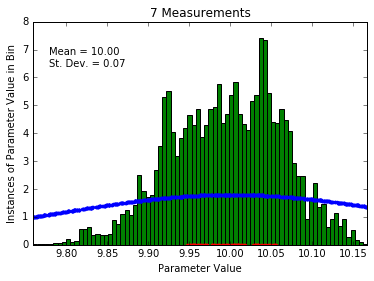

In [34]:
for i in range(len(measures)):
    plt.hist(pars['par{0}'.format(measures[i])], bins = 80, normed = True, color = 'g')
    for thing in init['init{0}'.format(measures[i])]:
        plt.plot(thing,0, '.', color='r')
    x = 100*(0.5-np.random.rand(200000))
    plt.plot(x,norm.pdf(x,best['best{0}'.format(measures[i])],standard['standard{0}'.format(measures[i])]),'.')
    plt.xlim([min(pars['par{0}'.format(measures[i])]),max(pars['par{0}'.format(measures[i])])])
    plt.annotate('Mean = {0:.2f} \nSt. Dev. = {1:.2f}'.format(pars['par{0}'.format(measures[i])].mean(), pars['par{0}'.format(measures[i])].std()), xy=(0.05, 0.8), xycoords='axes fraction')
    plt.xlabel('Parameter Value')
    plt.ylabel('Instances of Parameter Value in Bin')
    plt.title('{0} Measurements\n Raw Search Values - NOT unweighted'.format(measures[i]))
    plt.savefig('{0}measurements/Analysis_Attempt{1}/Results/parameter_search_hist.pdf'.format(measures[i],Attempt))
    plt.show()
    

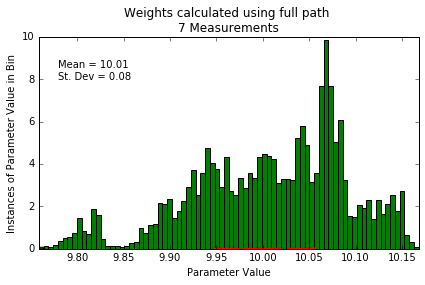

In [35]:
for i in range(len(measures)):
    aveweight = np.power(np.divide(weight['weight{0}'.format(measures[i])],np.power(10,np.mean(np.log10(weight['weight{0}'.format(measures[i])])))),nT)
    stats = ws(pars['par{0}'.format(measures[i])], weights = np.divide(1,aveweight),ddof=0)
    (n, b, patches) = plt.hist(pars['par{0}'.format(measures[i])],weights = np.divide(1,aveweight), bins = 80,normed = True,color='g');
    for thing in init['init{0}'.format(measures[i])]:
        plt.plot(thing,0, '.', color='r')
    plt.annotate('Mean = {0:.2f} \nSt. Dev = {1:.2f}'.format(stats.mean, stats.std), xy=(0.05, 0.8), xycoords='axes fraction')
    plt.xlabel('Parameter Value')
    plt.ylabel('Instances of Parameter Value in Bin')
    plt.title('Properly Weighted Histogram\n{0} Measurements'.format(measures[i]))
    plt.xlim([min(pars['par{0}'.format(measures[i])]),max(pars['par{0}'.format(measures[i])])])
    plt.tight_layout()
    plt.savefig('{1}measurements/Analysis_Attempt{0}/Results/Full_unweightedParamHist.pdf'.format(Attempt, measures[i]))
    plt.show()
    bincenters = np.zeros(np.shape(n))
    bincenters[:] = (b[:-1]+b[1:])/2
    histdata = np.array([bincenters,n]).T
    np.savetxt('HistogramL{}.txt'.format(measures[i]),histdata)

In [ ]:
for i in range(len(measures)):
    stats = ws(pars['par{0}'.format(measures[i])], weights = np.divide(1,weight_wrong['weight{0}'.format(measures[i])]),ddof=0)
    n, b, patches = plt.hist(pars['par{0}'.format(measures[i])],weights = np.divide(1,weight_wrong['weight{0}'.format(measures[i])]), bins = 80,normed = True,color='g');
    for thing in init['init{0}'.format(measures[i])]:
        plt.plot(thing,0, '.', color='r')
    plt.annotate('Mean = {0:.2f} \nSt. Dev = {1:.2f}'.format(stats.mean, stats.std), xy=(0.05, 0.8), xycoords='axes fraction')
    plt.xlabel('Parameter Value')
    plt.ylabel('Instances of Parameter Value in Bin')
    plt.title('Weights calculated using just parameter \n{0} Measurements'.format(measures[i]))
    plt.xlim([min(pars['par{0}'.format(measures[i])]),max(pars['par{0}'.format(measures[i])])])
    plt.tight_layout()
    plt.savefig('{1}measurements/Analysis_Attempt{0}/Results/Partial_unweightedParamHist.pdf'.format(Attempt, measures[i]))
    plt.show()

In [17]:
var = np.ones((len(measures), nS, nT))
true = np.ones((nS, nT))
for state in range(nS):
    true[state] = np.loadtxt('{0}measurements/data{1}.txt'.format(measures[0], state))[:nT]
    i=0
    for meas in measures:
        var[i, state] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/mean_variable_{2}.txt'.format(meas, Attempt, state))
        i = i+1
time = np.arange(0,(nT)*0.025,0.025)

uvar = np.ones((len(measures), nS, nT))        
ustd = np.ones((len(measures), nS, nT))
std = np.ones((len(measures), nS, nT))
Sstd = np.ones((len(measures),nS, nT))
sm = np.ones((len(measures),nS,nT))
for state in range(nS):
    i=0
    for meas in measures:
        uvar[i, state] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/unweighted_mean_variable_{2}.txt'.format(meas, Attempt, state))
        std[i, state] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/std_variable_{2}.txt'.format(meas, Attempt, state))
        ustd[i, state] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/unweighted_std_variable_{2}.txt'.format(meas, Attempt, state))
        Sstd[i, state] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/SigmaSearchVariable_{2}.txt'.format(meas, Attempt, state))
        sm[i, state] = np.loadtxt('{0}measurements/Analysis_Attempt{1}/Results/MeanSearchVariable_{2}.txt'.format(meas, Attempt, state))
        i = i+1

/home/sasha/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


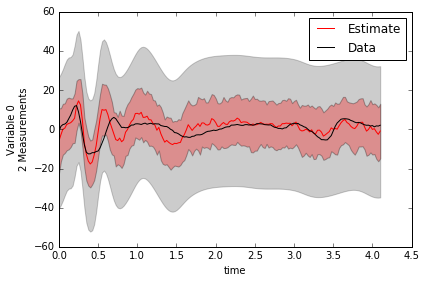

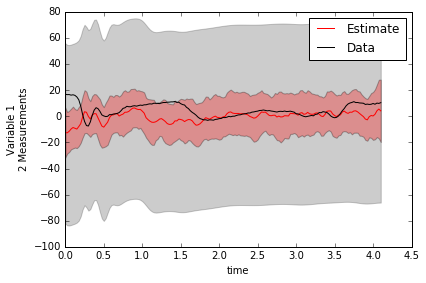

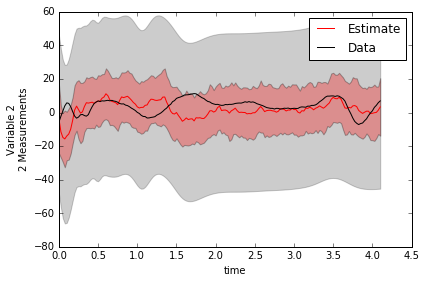

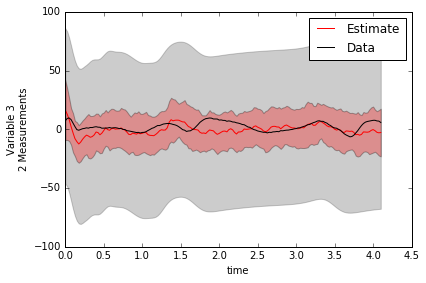

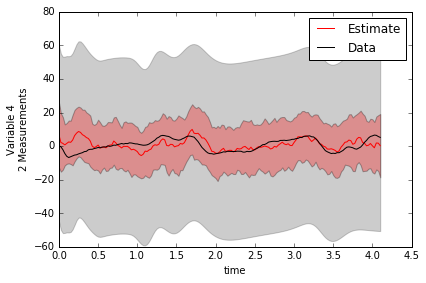

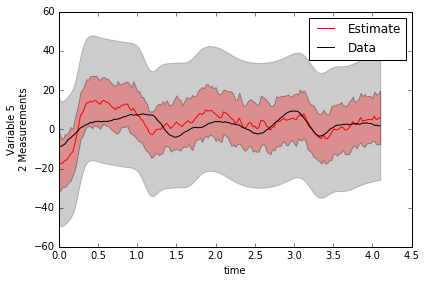

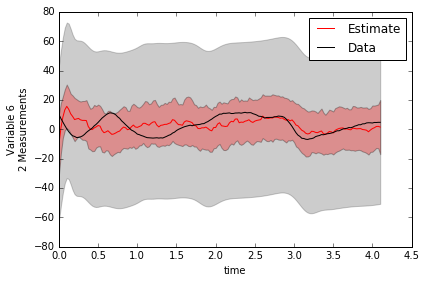

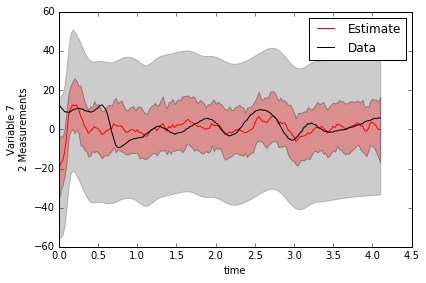

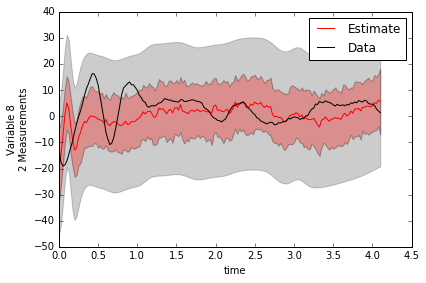

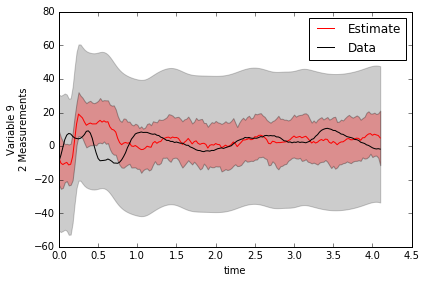

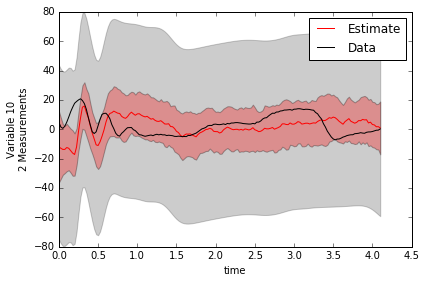

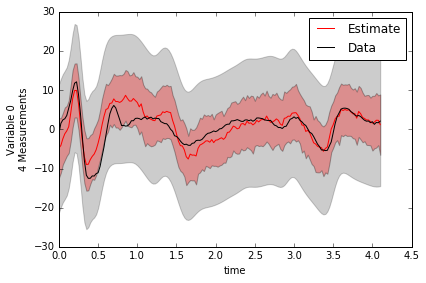

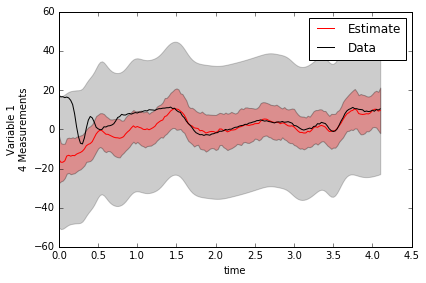

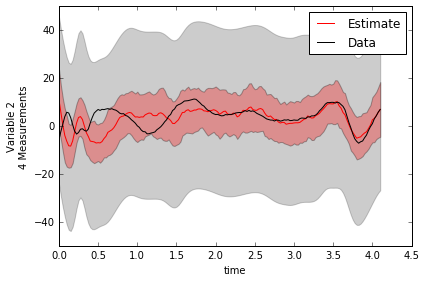

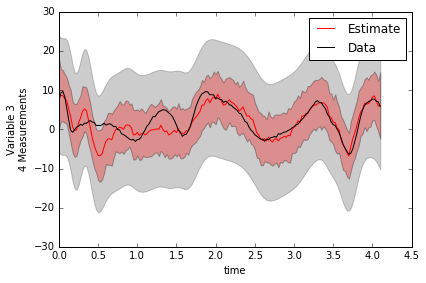

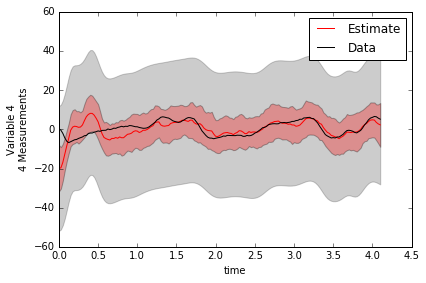

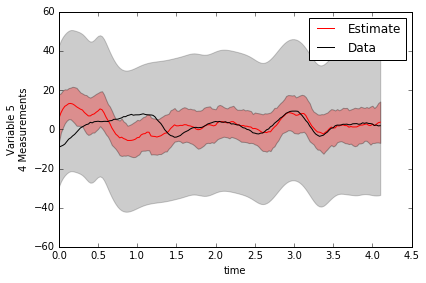

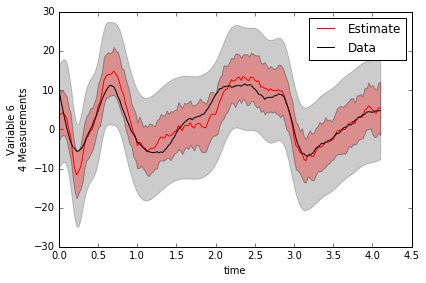

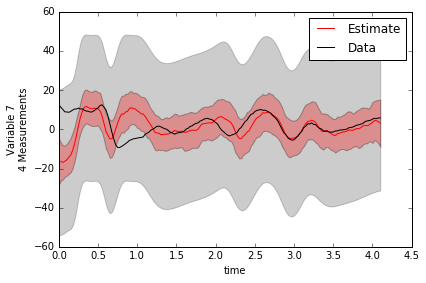

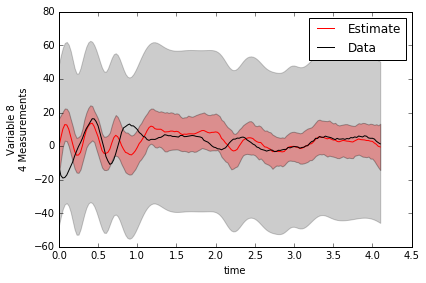

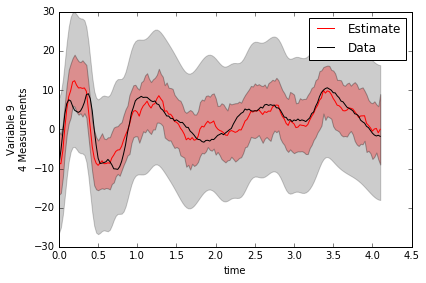

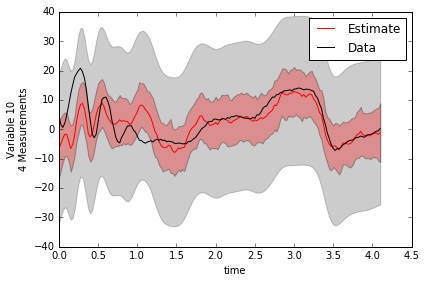

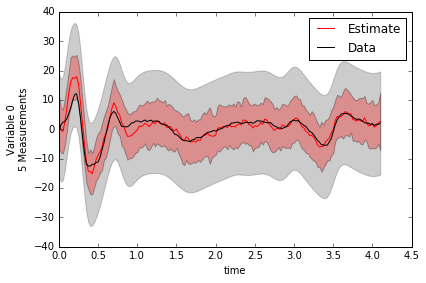

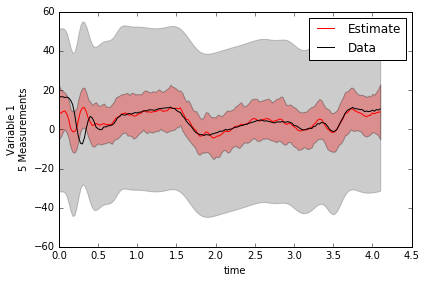

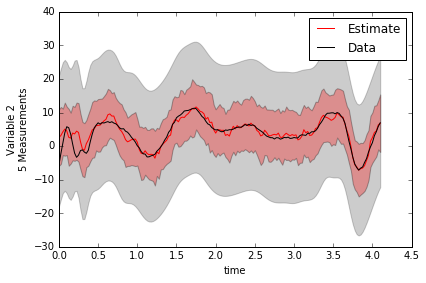

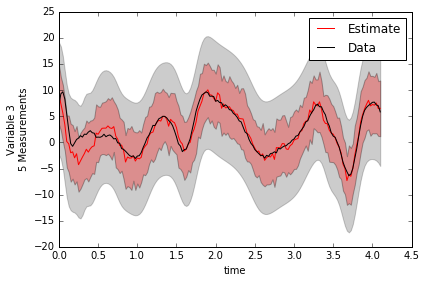

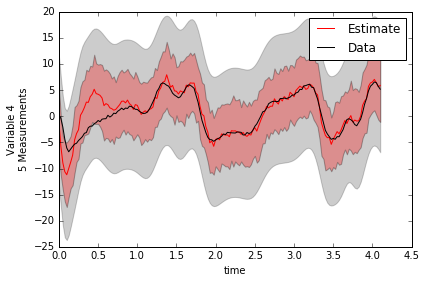

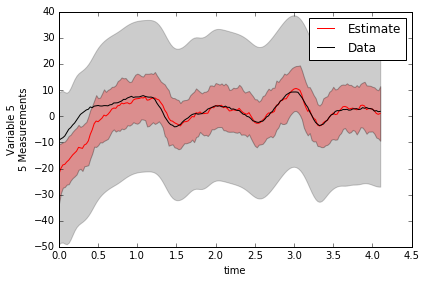

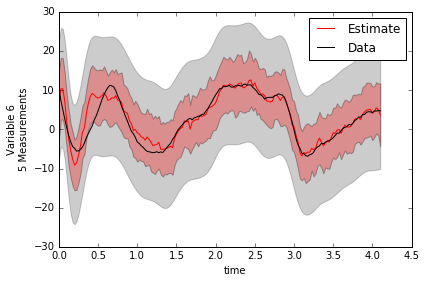

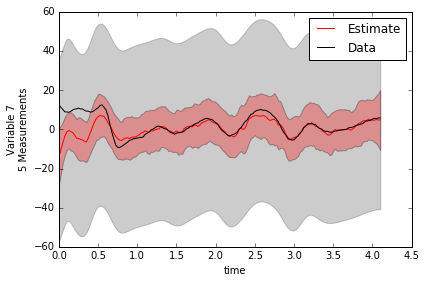

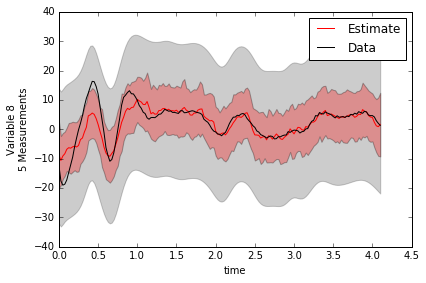

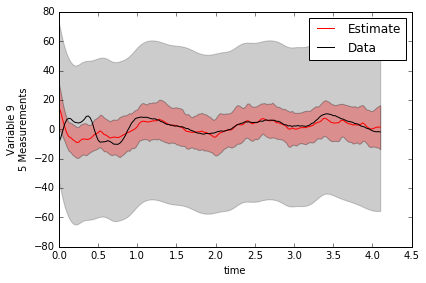

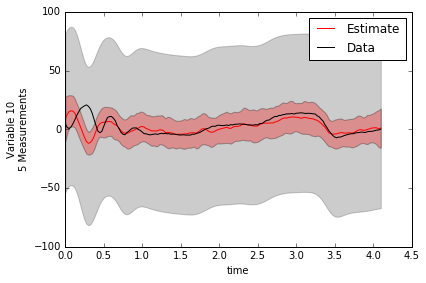

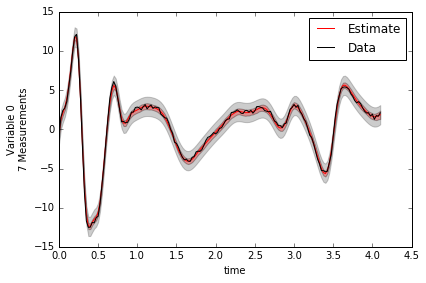

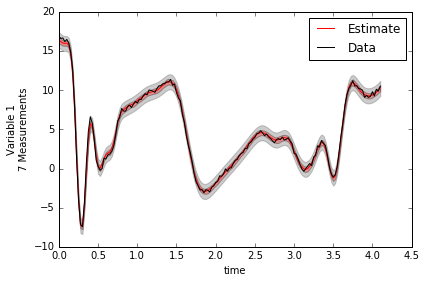

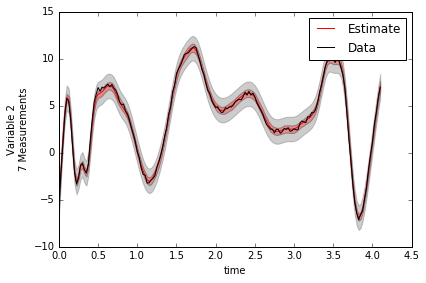

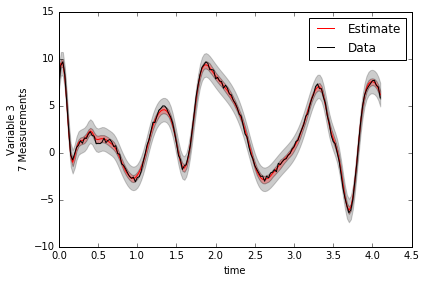

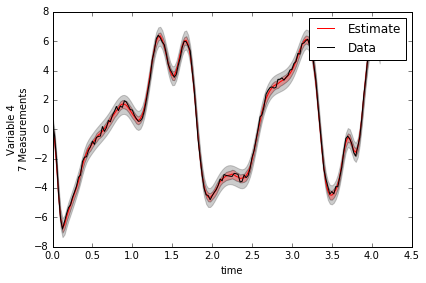

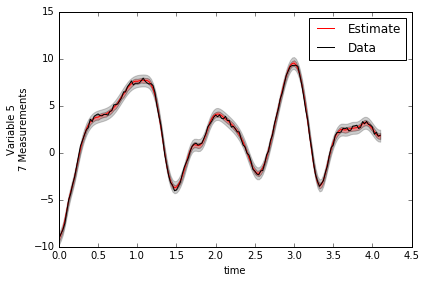

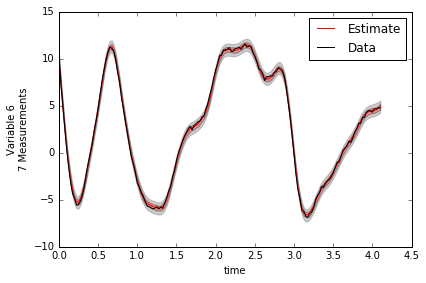

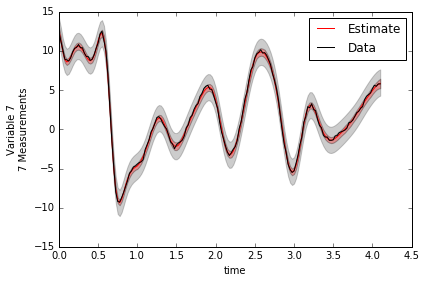

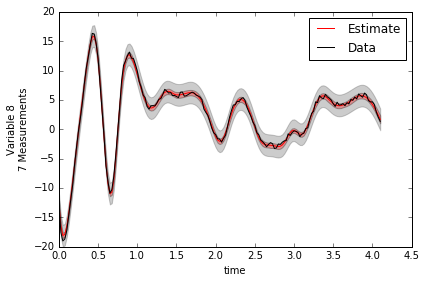

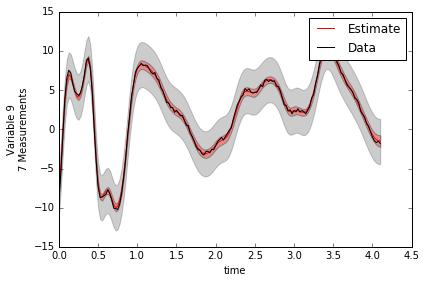

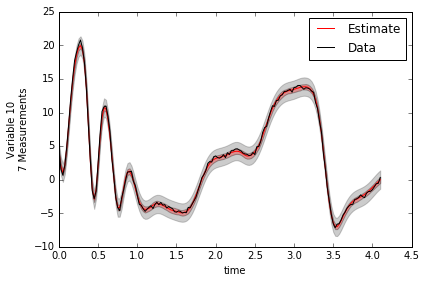

In [18]:
for l in range(len(measures)):
    for i in range(nS):
        plt.figure()
        estimate, = plt.plot(time,var[l,i],color='r',label='Estimate')
        plt.fill_between(time,sm[l,i]+Sstd[l,i]/2,sm[l,i]-Sstd[l,i]/2, facecolor='black',alpha = 0.2)
        #plt.fill_between(time,Sm2[i]+Sstd2[i]/(2*np.sqrt(3)),Sm2[i]-Sstd2[i]/(2*np.sqrt(3)), facecolor='black',alpha = 0.2)
        plt.fill_between(time,var[l,i]+std[l,i],var[l,i]-std[l,i], facecolor='red',alpha = 0.3)
        data, = plt.plot(time,true[i],color='black',label='Data')
        plt.legend(handles=[estimate,data])
        plt.ylabel('Variable {0}\n{1} Measurements'.format(i, measures[l]))
        plt.xlabel('time')
        plt.tight_layout()
        plt.savefig('{2}measurements/Analysis_Attempt{0}/Results/Variable{1}Estimate.pdf'.format(Attempt,i,measures[l]))

/home/sasha/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


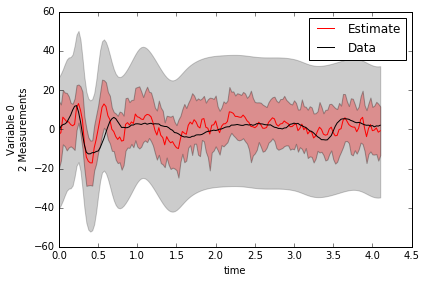

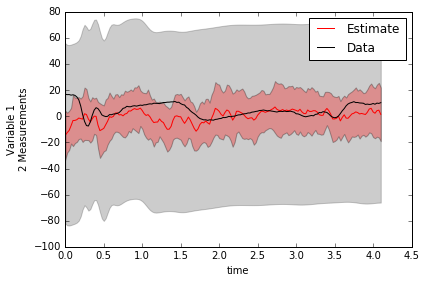

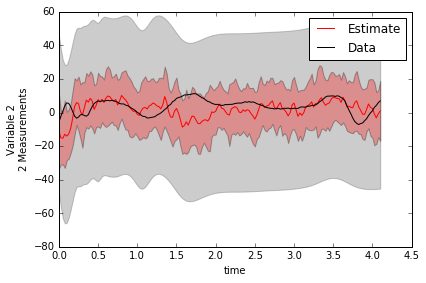

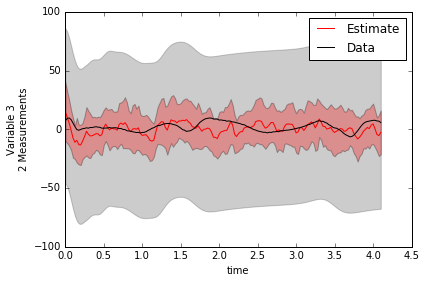

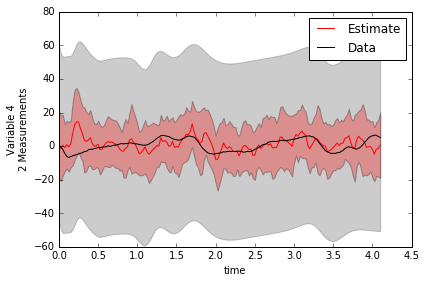

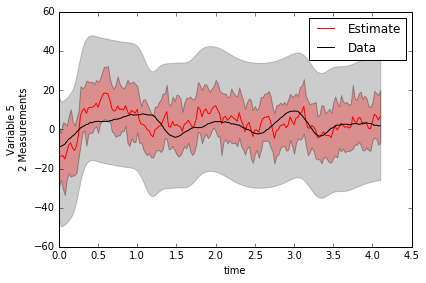

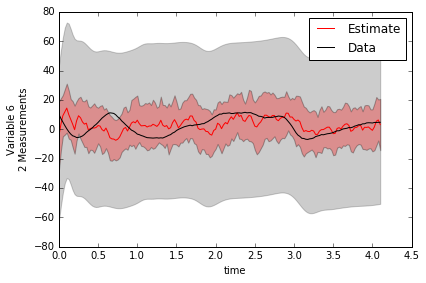

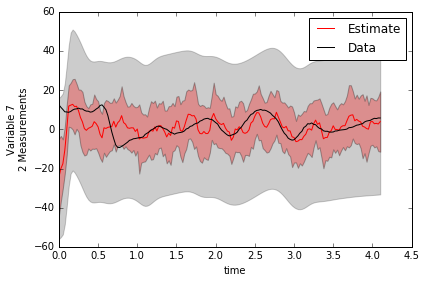

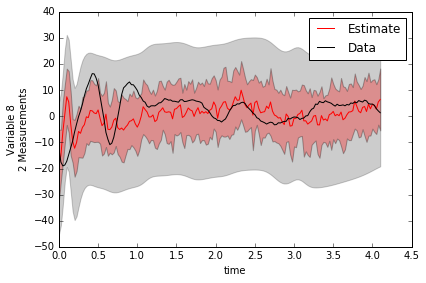

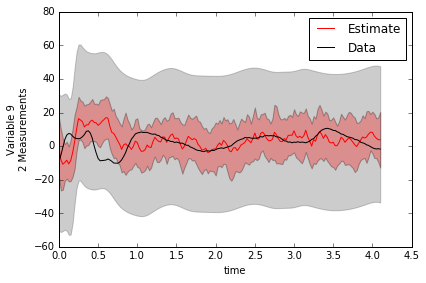

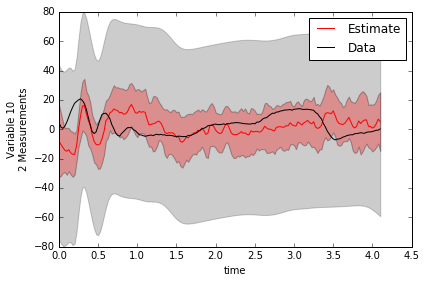

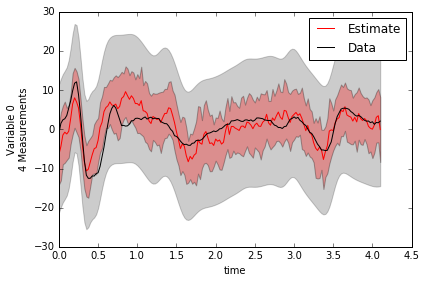

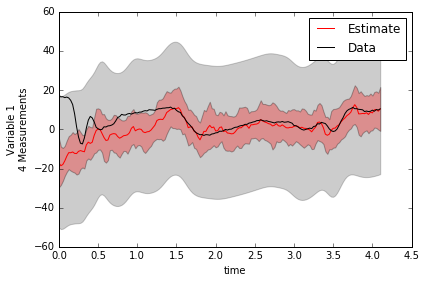

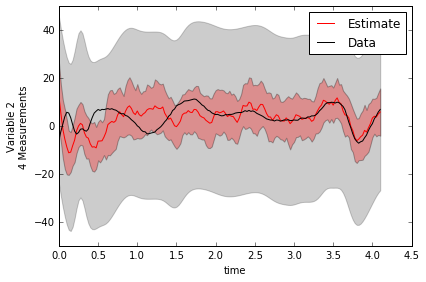

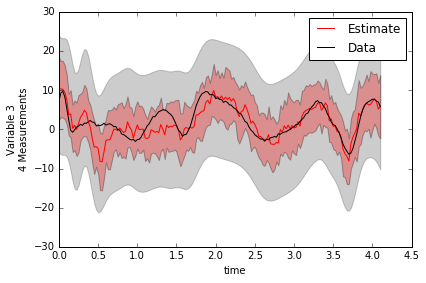

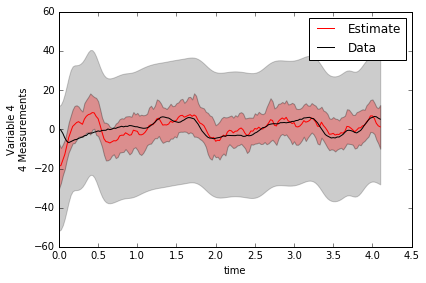

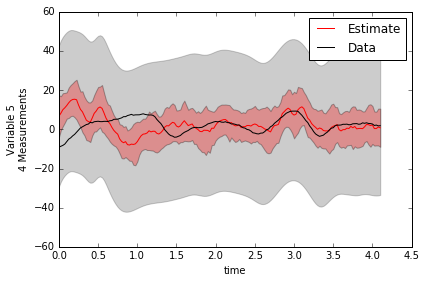

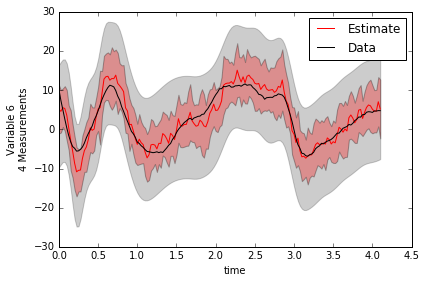

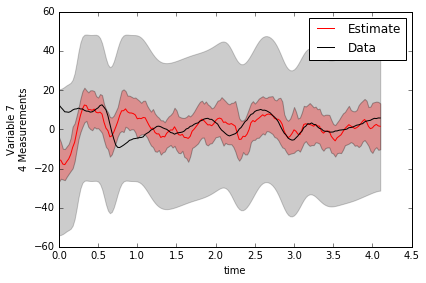

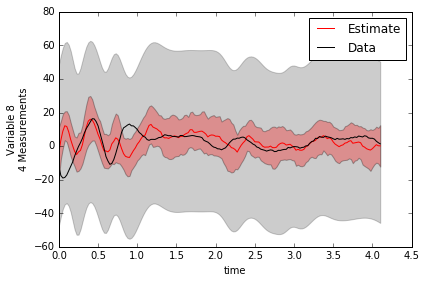

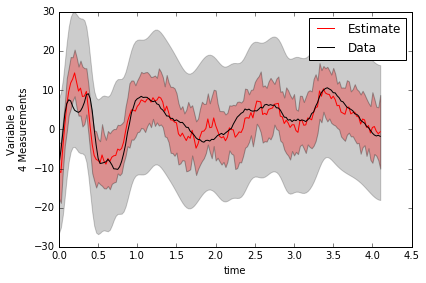

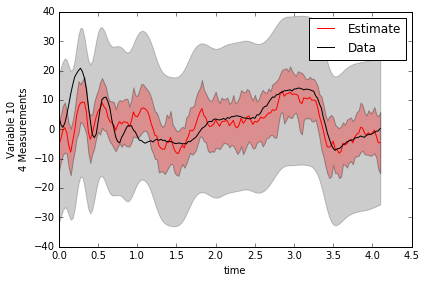

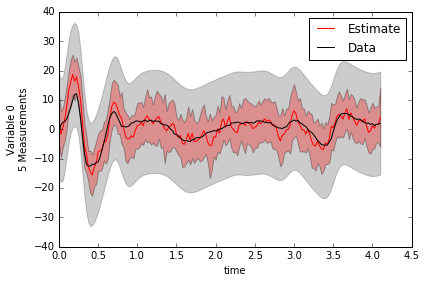

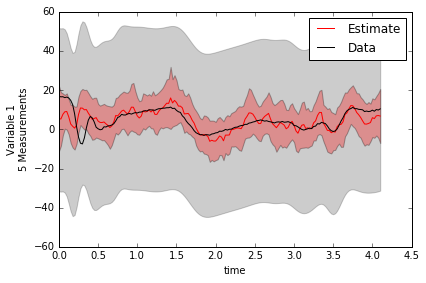

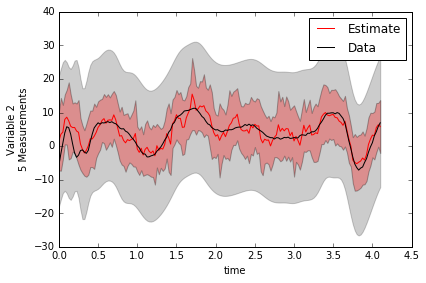

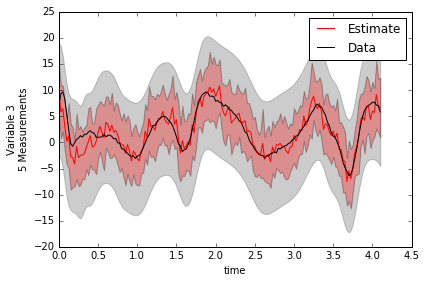

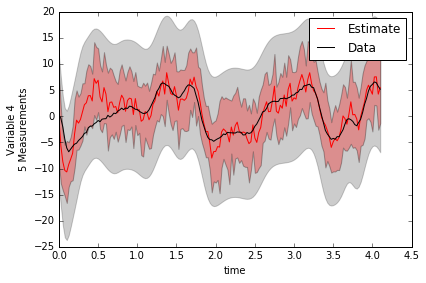

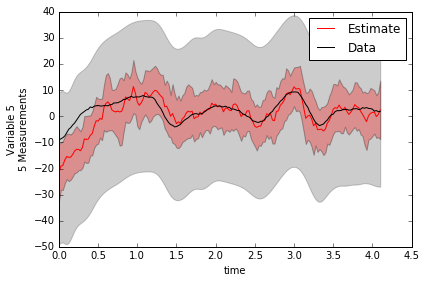

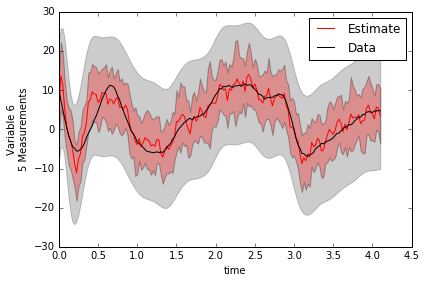

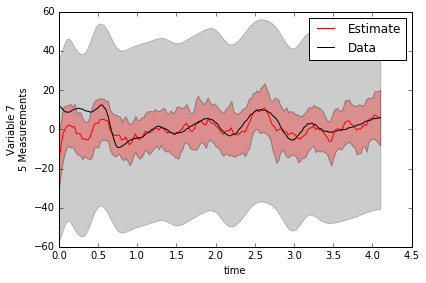

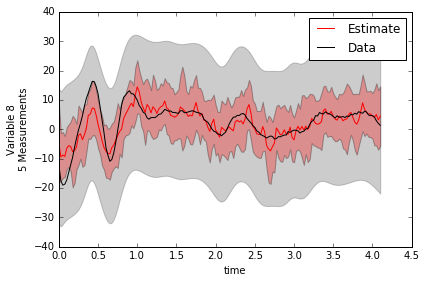

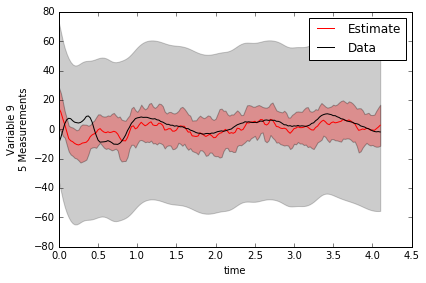

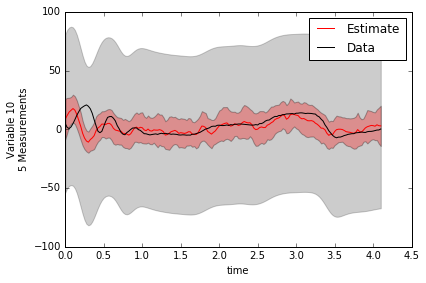

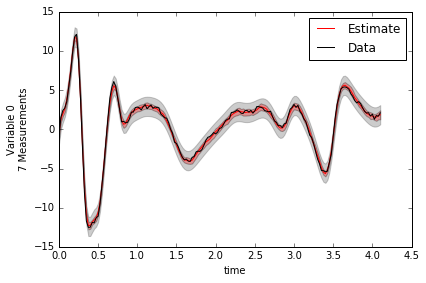

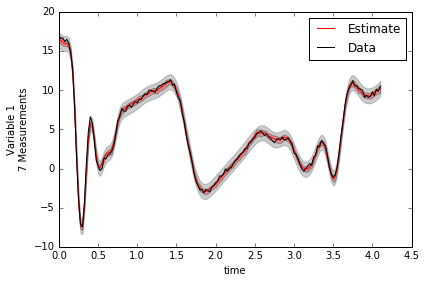

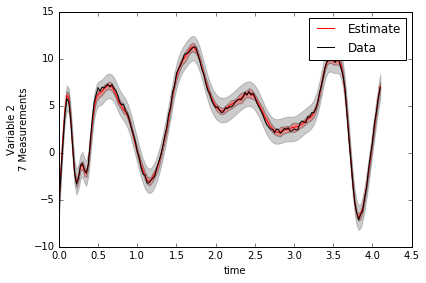

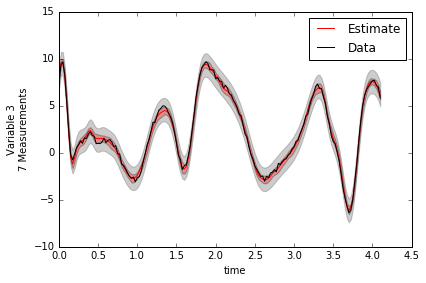

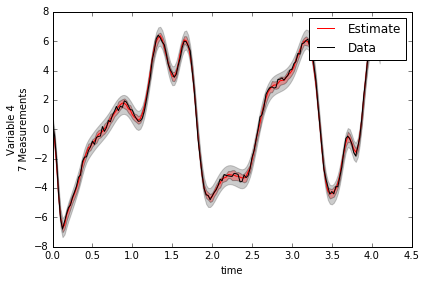

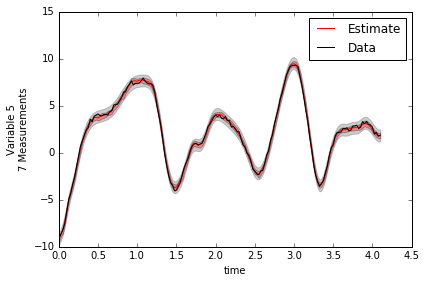

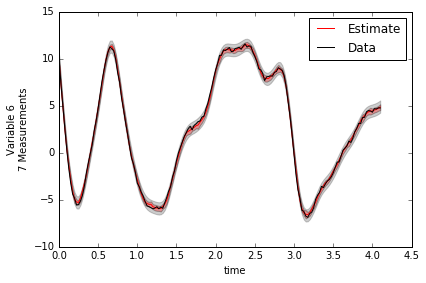

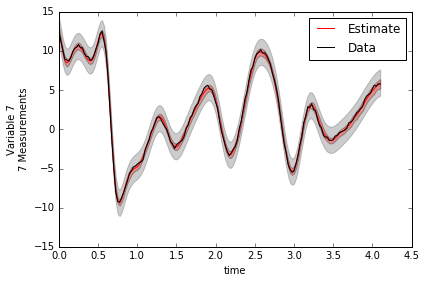

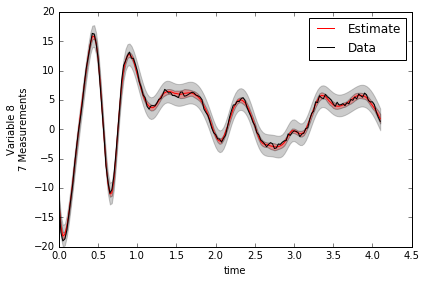

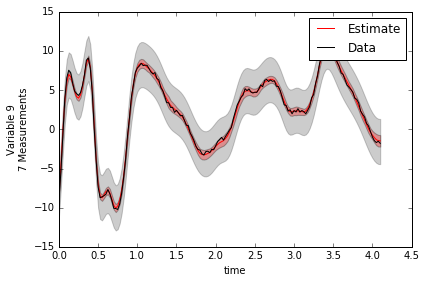

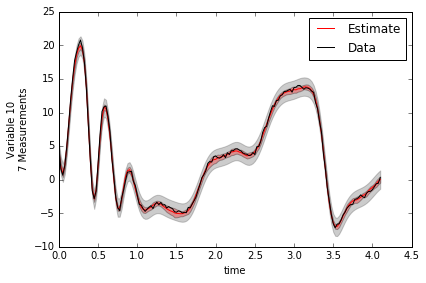

In [19]:
for l in range(len(measures)):
    for i in range(nS):
        plt.figure()
        estimate, = plt.plot(time,uvar[l,i],color='r',label='Estimate')
        plt.fill_between(time,sm[l,i]+Sstd[l,i]/2,sm[l,i]-Sstd[l,i]/2, facecolor='black',alpha = 0.2)
        #plt.fill_between(time,Sm2[i]+Sstd2[i]/(2*np.sqrt(3)),Sm2[i]-Sstd2[i]/(2*np.sqrt(3)), facecolor='black',alpha = 0.2)
        plt.fill_between(time,uvar[l,i]+ustd[l,i],uvar[l,i]-ustd[l,i], facecolor='red',alpha = 0.3)
        data, = plt.plot(time,true[i],color='black',label='Data')
        plt.legend(handles=[estimate,data])
        plt.ylabel('Variable {0}\n{1} Measurements'.format(i, measures[l]))
        plt.xlabel('time')
        plt.tight_layout()
        plt.savefig('{2}measurements/Analysis_Attempt{0}/Results/UnweightedVariable{1}Estimate.pdf'.format(Attempt,i,measures[l]))

In [20]:
plt.close("all")